In [123]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model


In [124]:
import pandas as pd

# Chargement du jeu de données
data = pd.read_csv("data/BenignAndMaliciousDataset.csv")

In [125]:
# Séparation des fonctionnalités et de la cible
X = data[['DNSRecordType', 'NumericSequence', 'NumericRatio', 'StrangeCharacters', 'ConsoantRatio', 'RegisteredOrg']]
y = data['Class']

In [126]:
#avant l'encodage

numeric_features = ['NumericSequence', 'NumericRatio', 'StrangeCharacters', 'ConsoantRatio','SubdomainNumber']
print (data[numeric_features])
print("Avant l'encodage: \n")

#Avant l'encodage de l'attribut categroriciel

categorical_feature1 = data['DNSRecordType']
categorical_feature2 = data['RegisteredOrg']

print("Features 1: \n")
print(categorical_feature1)

print("Features 2: \n")
print(categorical_feature2)

       NumericSequence  NumericRatio  StrangeCharacters  ConsoantRatio   
0                    1           0.1                 11            0.6  \
1                    2           0.1                 11            0.7   
2                    3           0.2                 24            0.6   
3                    2           0.1                 15            0.6   
4                    2           0.2                 23            0.6   
...                ...           ...                ...            ...   
89995                2           0.2                  3            0.5   
89996                0           0.0                  0            0.6   
89997                2           0.1                  1            0.5   
89998                0           0.0                  0            0.5   
89999                0           0.0                  1            0.6   

       SubdomainNumber  
0                    0  
1                    0  
2                    0  
3          

In [127]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

#prepocessing des features numeriques soit  avec le  LabelEncoder soit le MinMaxScaler()

# Sélection des fonctionnalités numériques
numeric_features = data[['NumericSequence', 'NumericRatio', 'StrangeCharacters', 'ConsoantRatio','SubdomainNumber']]

# Création d'un scaler
scaler = MinMaxScaler()

# Ajustement du scaler aux données
scaler.fit(numeric_features)

# Transformation des fonctionnalités numériques
scaled_numeric_features = scaler.transform(numeric_features)

In [128]:
# Apres transformation Création d' un DataFrame à partir des valeurs transformées

scaled_df = pd.DataFrame(scaled_numeric_features, columns=numeric_features.columns)

# Afficher le DataFrame avec les valeurs transformées
print("Après transformation")
print(scaled_df)

total_size = scaled_df.shape

print("Taille totale des caracteristiques numeriques apres concatenations :", total_size)

Après transformation
       NumericSequence  NumericRatio  StrangeCharacters  ConsoantRatio   
0             0.022222         0.125           0.088710            0.6  \
1             0.044444         0.125           0.088710            0.7   
2             0.066667         0.250           0.193548            0.6   
3             0.044444         0.125           0.120968            0.6   
4             0.044444         0.250           0.185484            0.6   
...                ...           ...                ...            ...   
89995         0.044444         0.250           0.024194            0.5   
89996         0.000000         0.000           0.000000            0.6   
89997         0.044444         0.125           0.008065            0.5   
89998         0.000000         0.000           0.000000            0.5   
89999         0.000000         0.000           0.008065            0.6   

       SubdomainNumber  
0                  0.0  
1                  0.0  
2              

In [129]:
#je tokenrise d'abord les attribut categoriciel

from tensorflow.keras.preprocessing.text import Tokenizer


#la  tokenrisation s'applique sur une listte de chaine de caractere et non sur une serie pandas to je fais un casting [.tolist()]

categorical_feature1 = data['DNSRecordType'].astype(str).tolist()  # Convertir la série en liste de chaînes de caractères
categorical_feature2 = data['RegisteredOrg'].astype(str).tolist()  # Convertir la série en liste de chaînes de caractères


# Création d'un objet Tokenizer

# Création d'un objet Tokenizer pour chaque caractéristique
tokenizer1 = Tokenizer()
tokenizer2 = Tokenizer()

# Adaptation du tokenizer aux données textuelles

# tokenizer.fit_on_texts([categorical_feature1 , categorical_feature1 ])

tokenizer1.fit_on_texts([categorical_feature1])
tokenizer2.fit_on_texts([categorical_feature2])

# Tokenization des textes

tokens_feature1 = tokenizer1.texts_to_sequences([categorical_feature1])[0]
tokens_feature2 = tokenizer2.texts_to_sequences([categorical_feature2])[0]

print("Tokens feature 1:", tokens_feature1)
print("Tokens feature 2:", tokens_feature2)


Tokens feature 1: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [ ]:
# import itertools

# print("taille des features 1 apres tokenrisation\n")
# tokens_feature1 = list(itertools.chain(*tokens_feature1))

# print("taille des features 2 apres tokenrisation\n")
# tokens_feature2 = list(itertools.chain(*tokens_feature2))

# maxlen_feature1 = np.max([len(x) for x in tokens_feature1])
# maxlen_feature2 = np.max([len(x) for x in tokens_feature2])

# print("Maxlen features 1 \n")
# print(maxlen_feature1)

# print("Maxlen features 2\n")
# print(maxlen_feature2)

In [130]:
#je tokenrise d'abord les attribut categoriciel

from tensorflow.keras.preprocessing.text import Tokenizer


#la  tokenrisation s'applique sur une listte de chaine de caractere et non sur une serie pandas to je fais un casting [.tolist()]

categorical_feature1 = data['DNSRecordType'].astype(str).tolist()  # Convertir la série en liste de chaînes de caractères
categorical_feature2 = data['RegisteredOrg'].astype(str).tolist()  # Convertir la série en liste de chaînes de caractères

#combinaison avec separateur  comme on peut le faire directement

tokenizer3 = Tokenizer(num_words= 10)

# combined_text = categorical_feature1 +'SEPARATOR' + categorical_feature2

# combined_text = categorical_feature1 + categorical_feature2

# combined_text = [f"{feat1} SEPARATOR {feat2}" for feat1, feat2 in zip(categorical_feature1, categorical_feature2)]


# Concaténation des features textuelles avec un séparateur
combined_text = [f"{feat1} SEPARATOR {feat2}" for feat1, feat2 in zip(categorical_feature1, categorical_feature2)]

# Tokenisation des textes combinés
tokenizer3 = Tokenizer(num_words=10)
tokenizer3.fit_on_texts(combined_text)
tokens = tokenizer3.texts_to_sequences(combined_text)



# tokenizer3.fit_on_texts([combined_text])
# tokens = tokenizer3.texts_to_sequences([combined_text])[0]

# tokens = tokenizer3.texts_to_sequences([combined_text])


print("Tokens feature 1 + Tokens feature 2")
print(tokens)

print("Calcul des longueur de sequence \n")

seq_lengths = [len(x) for x in tokens]

print(seq_lengths)

Tokens feature 1 + Tokens feature 2
[[2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1], [2, 1, 4], [2, 1], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1, 4], [2, 1], [2, 1], [2, 1], [2, 1], [2, 1], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], [3, 1, 5, 6], 

In [131]:
#Calcule des statistique descriptive sur les longueur des sequences

mean_length = np.mean(seq_lengths)
max_length = np.max(seq_lengths)
min_length = np.min(seq_lengths)
std_dev = np.std(seq_lengths)


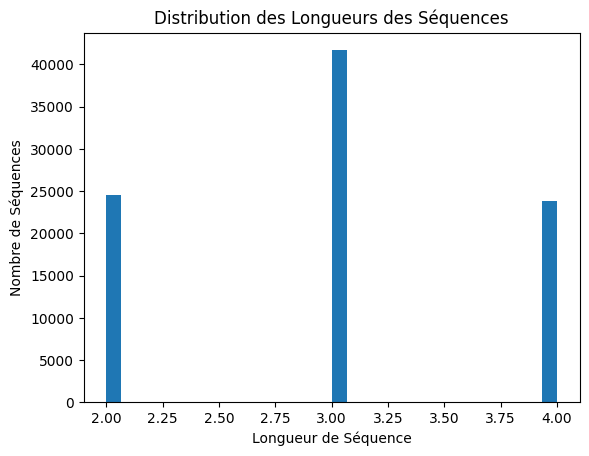

In [132]:
# Visualisation de la distribution des longueurs des séquences
import matplotlib.pyplot as plt
plt.hist(seq_lengths, bins=30)
plt.xlabel('Longueur de Séquence')
plt.ylabel('Nombre de Séquences')
plt.title('Distribution des Longueurs des Séquences')
plt.show()


In [133]:
print(f"Longueur maximale de séquence : {max_length}")
print(f"Longueur minimale de séquence : {min_length}")
print(f"Longueur moyenne de séquence : {mean_length}")
print(f"Écart-type de la longueur de séquence : {std_dev}")


Longueur maximale de séquence : 4
Longueur minimale de séquence : 2
Longueur moyenne de séquence : 2.991911111111111
Écart-type de la longueur de séquence : 0.7326065435513943


In [134]:
# Hyperparamètres et dimensions des données*
taille_num_features = 5
taille_text_features = 4 
vocab_size = 20000  
embedding_dim = 128  

In [135]:
# Entrées
input_num = layers.Input(shape=(taille_num_features,))
input_text = layers.Input(shape=(taille_text_features,))


In [137]:
# Branches du modèle
# Branche numérique - FFN

num_branch = layers.Dense(64, activation='relu')(input_num)
num_branch = layers.Dense(32, activation='relu')(num_branch)


In [139]:
# Branche textuelle - Embedding + LSTM
text_branch = layers.Embedding(vocab_size, embedding_dim, input_length=taille_text_features)(input_text)
text_branch = layers.LSTM(32)(text_branch)


In [140]:
# Fusion des branches
merged = layers.concatenate([num_branch, text_branch])


In [141]:
# Couches supplémentaires après la fusion
merged = layers.Dropout(0.5)(merged)
merged = layers.Dense(16, activation='relu')(merged)
output = layers.Dense(1, activation='sigmoid')(merged)


In [142]:
# Création et compilation du modèle
model = Model(inputs=[input_num, input_text], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [143]:
# Création et compilation du modèle
model = Model(inputs=[input_num, input_text], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [144]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


# data_num = data[['NumericSequence', 'NumericRatio', 'StrangeCharacters', 'ConsoantRatio']]
# data_text = data[['DNSRecordType','RegisteredOrg']]
labels = data['Class']

# Entrées pour l'entraînement
data_num = scaled_numeric_features  
# data_text = np.array(tokens)  
data_text = pad_sequences(tokens, maxlen=max_length,padding='post')



In [145]:
# Assurez-vous que les données numériques sont correctes
print("Shape of data_num:", data_num.shape)

# Assurez-vous que les données textuelles sont correctes après le rembourrage
print("Shape of data_text:", data_text.shape)

# Assurez-vous que les étiquettes sont correctes
print("Shape of labels:", labels.shape)

# NB utiliser le resultat obtenu pour modifier les tailles ou dimension de mes entrées definie plus haut



Shape of data_num: (90000, 5)
Shape of data_text: (90000, 4)
Shape of labels: (90000,)


In [146]:
# Entraînement du modèle
# model.fit([data_num, data_text], labels, epochs=10, batch_size=32)

history = model.fit([data_num, data_text], labels, epochs=5, batch_size=32)



Epoch 1/5
2813/2813 [==============================] - 251s 88ms/step - loss: 0.0660 - accuracy: 0.9757
Epoch 2/5
2813/2813 [==============================] - 244s 87ms/step - loss: 0.0338 - accuracy: 0.9887
Epoch 3/5
2813/2813 [==============================] - 217s 77ms/step - loss: 0.0300 - accuracy: 0.9898
Epoch 4/5
2813/2813 [==============================] - 219s 78ms/step - loss: 0.0272 - accuracy: 0.9907
Epoch 5/5
2813/2813 [==============================] - 221s 78ms/step - loss: 0.0238 - accuracy: 0.9914


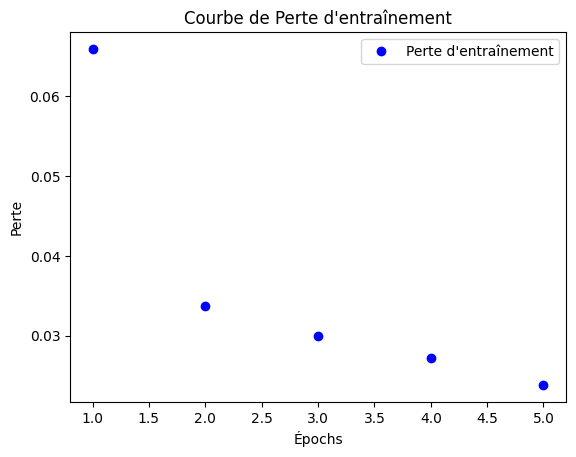

In [147]:
# Extraction des métriques d'entraînement
loss = history.history['loss']
accuracy = history.history['accuracy']

# Affichage des courbes de perte et d'exactitude
epochs = range(1, len(loss) + 1)

# Courbe de perte
plt.plot(epochs, loss, 'bo', label='Perte d\'entraînement')
plt.title('Courbe de Perte d\'entraînement')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()
plt.show()

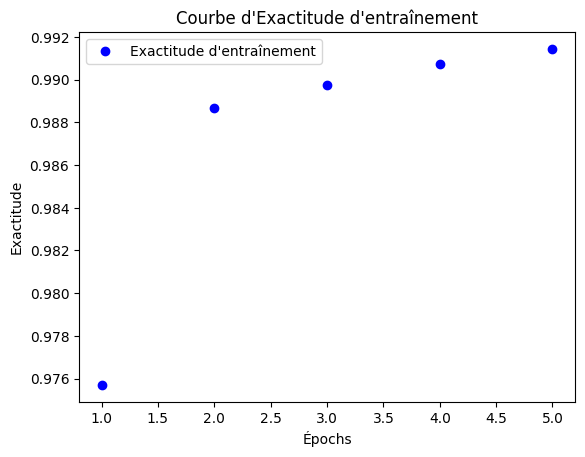

In [148]:
# Courbe d'exactitude
plt.plot(epochs, accuracy, 'bo', label='Exactitude d\'entraînement')
plt.title('Courbe d\'Exactitude d\'entraînement')
plt.xlabel('Épochs')
plt.ylabel('Exactitude')
plt.legend()
plt.show()

In [150]:
from sklearn.metrics import roc_curve, auc

# Prédictions sur les données d'entraînement
predictions = model.predict([data_num, data_text])

# Calcul des caractéristiques de la courbe ROC
fpr, tpr, thresholds = roc_curve(labels, predictions)

# Calcul de l'aire sous la courbe ROC (AUC)
roc_auc = auc(fpr, tpr)


2813/2813 [==============================] - 7s 3ms/step


In [152]:
print(predictions)

[[9.9208146e-01]
 [9.8564893e-01]
 [9.9660349e-01]
 ...
 [9.8750005e-03]
 [7.1249186e-04]
 [1.6497172e-05]]


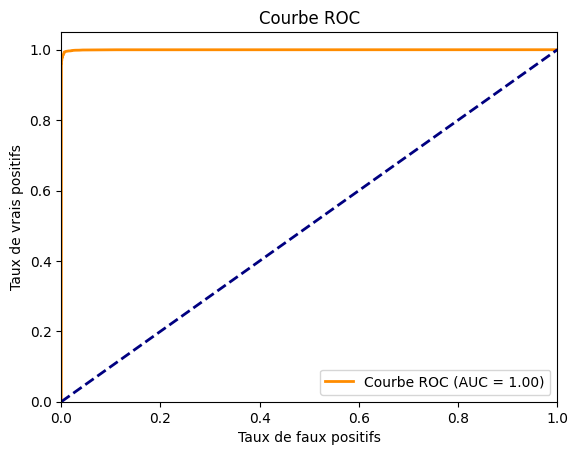

In [151]:
# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()

In [155]:
#maintenant on va divisser les donnee en deux [entrainenemt et text]

from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
text_train, text_test, num_train, num_test, labels_train, labels_test = train_test_split(
    data_text, data_num, y, test_size=0.2, random_state=42
)

In [156]:
print("Shape of text_train:", text_train.shape)
print("Shape of labels_train:", labels_train.shape)
print("Shape of text_test:", text_test.shape)
print("Shape of labels_test:", labels_test.shape)
print("Shape of num_train:", num_train.shape)
print("Shape of num_test:", num_test.shape)

print("Visualisation des dimension et du batch_size\n")

batch_size, dimension = text_train.shape[0], text_train.shape[1]
print("Batch size text train:", batch_size)
print("Dimension text train:", dimension)

batch_size, dimension = num_train.shape[0], num_train.shape[1]
print("Batch size num train:", batch_size)
print("Dimension num train:", dimension)



Shape of text_train: (72000, 4)
Shape of labels_train: (72000,)
Shape of text_test: (18000, 4)
Shape of labels_test: (18000,)
Shape of num_train: (72000, 5)
Shape of num_test: (18000, 5)
Visualisation des dimension et du batch_size

Batch size text train: 72000
Dimension text train: 4
Batch size num train: 72000
Dimension num train: 5


In [158]:
history_model2 = model.fit([num_train,text_train], labels_train, epochs=5, batch_size=32, validation_data=([num_test,text_test], labels_test))


Epoch 1/5
2250/2250 [==============================] - 184s 82ms/step - loss: 0.0229 - accuracy: 0.9920 - val_loss: 0.0198 - val_accuracy: 0.9916
Epoch 2/5
2250/2250 [==============================] - 180s 80ms/step - loss: 0.0219 - accuracy: 0.9918 - val_loss: 0.0189 - val_accuracy: 0.9938
Epoch 3/5
2250/2250 [==============================] - 204s 91ms/step - loss: 0.0216 - accuracy: 0.9921 - val_loss: 0.0177 - val_accuracy: 0.9938
Epoch 4/5
2250/2250 [==============================] - 206s 91ms/step - loss: 0.0214 - accuracy: 0.9922 - val_loss: 0.0190 - val_accuracy: 0.9932
Epoch 5/5
2250/2250 [==============================] - 201s 89ms/step - loss: 0.0207 - accuracy: 0.9926 - val_loss: 0.0171 - val_accuracy: 0.9937


In [159]:
# Évaluation du modèle sur les données de test
evaluation_results = model.evaluate([num_test, text_test], labels_test)

# Affichage des résultats
print("Perte sur les données de test:", evaluation_results[0])
print("Précision sur les données de test:", evaluation_results[1])


563/563 [==============================] - 3s 5ms/step - loss: 0.0171 - accuracy: 0.9937
Perte sur les données de test: 0.017100725322961807
Précision sur les données de test: 0.9937222003936768


In [160]:
# Extraction des métriques d'entraînement
loss = history_model2.history['loss']
accuracy = history_model2.history['accuracy']
val_loss = history_model2.history['val_loss']
val_accuracy = history_model2.history['val_accuracy']

# Affichage des courbes de perte et d'exactitude séparément
epochs = range(1, len(loss) + 1)

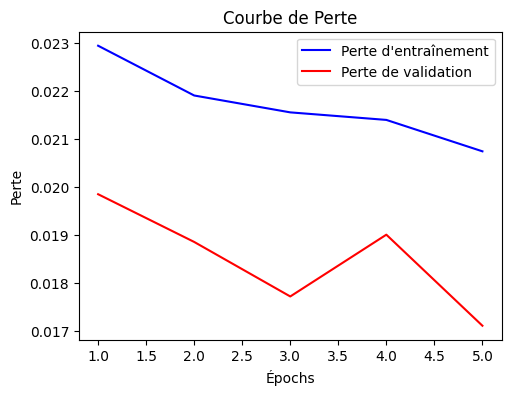

In [164]:
# Courbe de perte
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Perte d\'entraînement')
plt.plot(epochs, val_loss, 'r', label='Perte de validation')
plt.title('Courbe de Perte')
plt.xlabel('Épochs')
plt.ylabel('Perte')
plt.legend()

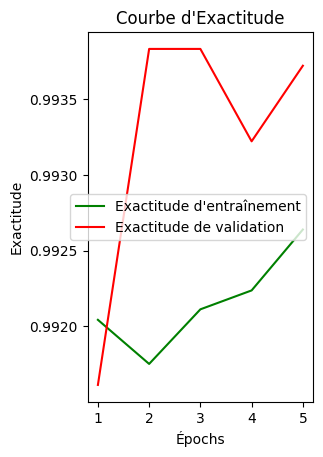

In [163]:
# Courbe d'exactitude
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'g', label='Exactitude d\'entraînement')
plt.plot(epochs, val_accuracy, 'r', label='Exactitude de validation')
plt.title('Courbe d\'Exactitude')
plt.xlabel('Épochs')
plt.ylabel('Exactitude')
plt.legend()

plt.show()